In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体

# 设置Seaborn全局字体（需系统有中文字体）
# sns.set(font="SimHei")  # 或直接设置 rcParams
# sns.set_theme(context="notebook", style="whitegrid", font_scale=1.2)

# 读取文件并添加地区列
df_china = pd.read_csv("china.csv").assign(Region="China")
df_global = pd.read_csv("ww.csv").assign(Region="Global")

# 合并数据
combined_df = pd.concat([df_china, df_global], ignore_index=True)

# 统一操作系统命名（例如将"OS X"重命名为"macOS"）
combined_df = combined_df.rename(columns={"OS X": "macOS"})

# 转换日期格式（确保时间序列正确）
combined_df["Date"] = pd.to_datetime(combined_df["Date"])

# 保存合并后的CSV文件
combined_df.to_csv("combined_market_share.csv", index=False)

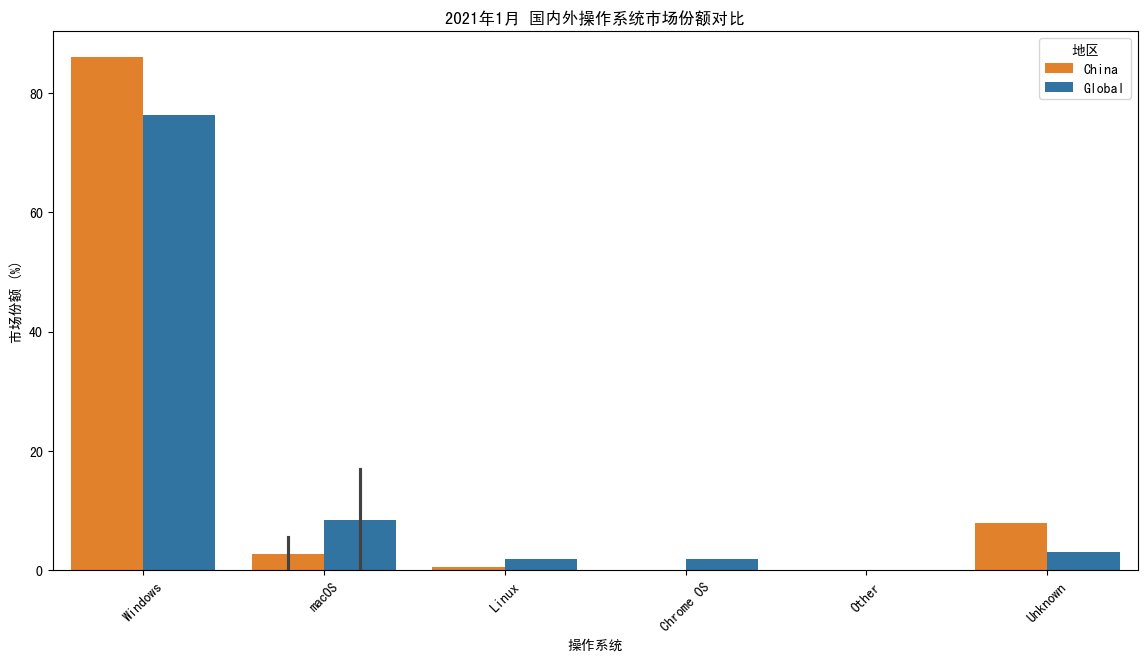

In [2]:


# 按日期和地区聚合数据（示例：对比2021年1月数据）
Month = "2021-01"
filtered_df = combined_df[combined_df["Date"].dt.strftime("%Y-%m") == Month]

# 将数据从宽格式转换为长格式（适合Seaborn绘图）
melted_df = filtered_df.melt(
    id_vars=["Date", "Region"],
    value_vars=["Windows", "macOS", "Linux", "Chrome OS", "Other", "Unknown"],
    var_name="OS",
    value_name="Market_Share"
)

# 绘制分组柱状图
plt.figure(figsize=(14, 7))
sns.barplot(
    data=melted_df,
    x="OS",
    y="Market_Share",
    hue="Region",
    palette={"China": "#ff7f0e", "Global": "#1f77b4"}
)
plt.title("2021年1月 国内外操作系统市场份额对比")
plt.xlabel("操作系统")
plt.ylabel("市场份额 (%)")
plt.legend(title="地区")
plt.xticks(rotation=45)
plt.show()

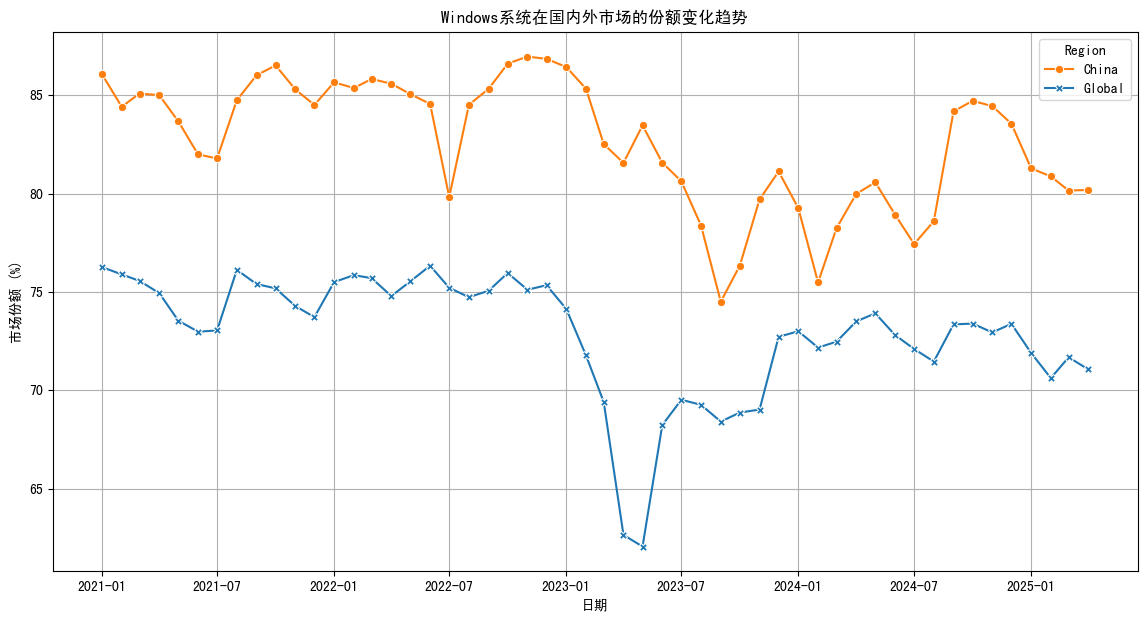

In [3]:
# 按日期和地区计算Windows份额均值（示例）
trend_df = combined_df.groupby(["Date", "Region"])["Windows"].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=trend_df,
    x="Date",
    y="Windows",
    hue="Region",
    style="Region",
    markers=True,
    dashes=False,
    palette={"China": "#ff7f0e", "Global": "#1f77b4"}
)
plt.title("Windows系统在国内外市场的份额变化趋势")
plt.xlabel("日期")
plt.ylabel("市场份额 (%)")
plt.grid(True)
plt.show()

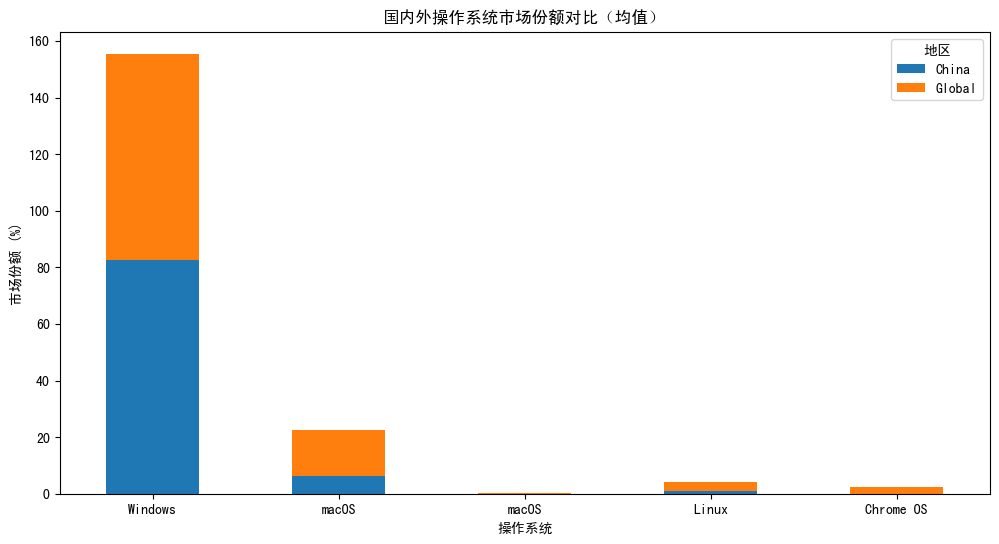

In [4]:
# 按地区聚合各系统均值（示例）
stack_df = combined_df.groupby("Region")[["Windows", "macOS", "Linux", "Chrome OS"]].mean().T

# 绘制堆叠柱状图
stack_df.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["#1f77b4", "#ff7f0e"]
)
plt.title("国内外操作系统市场份额对比（均值）")
plt.xlabel("操作系统")
plt.ylabel("市场份额 (%)")
plt.xticks(rotation=0)
plt.legend(title="地区")
plt.show()

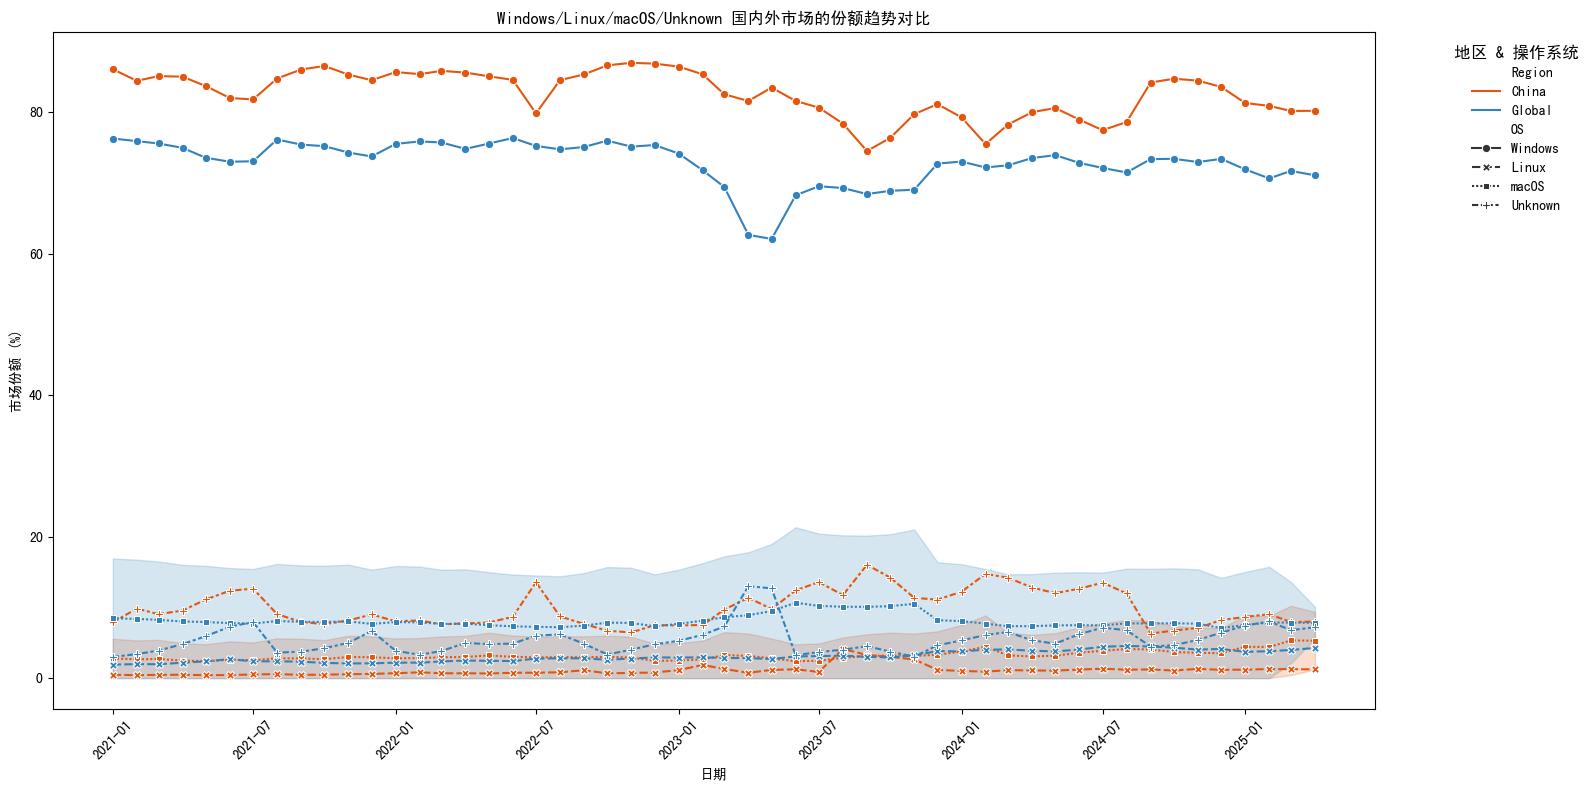

In [12]:
# plt.rcParams['font.sans-serif'] = ["SimHei", "Microsoft YaHei", "WenQuanYi Zen Hei"]  # 按优先级尝试
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 提取目标操作系统
target_os = ["Windows", "Linux", "macOS", "Unknown"]
melted_df = combined_df.melt(
    id_vars=["Date", "Region"],
    value_vars=target_os,
    var_name="OS",
    value_name="Market_Share"
)

# 绘图
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=melted_df,
    x="Date",
    y="Market_Share",
    hue="Region",
    style="OS",
    markers=True,
    palette={"China": "#e6550d", "Global": "#3182bd"}
)
plt.title("Windows/Linux/macOS/Unknown 国内外市场的份额趋势对比")
plt.xlabel("日期")
plt.ylabel("市场份额 (%)")
plt.xticks(rotation=45)
plt.legend(title="地区 & 操作系统", bbox_to_anchor=(1.05, 1))

# 调整图例字体大小
legend = plt.legend(
    title="地区 & 操作系统",
    bbox_to_anchor=(1.05, 1),  # 保持图例在右侧
    loc="upper left",
    title_fontsize=12,  # 图例标题字体大小
    fontsize=10,        # 图例标签字体大小
    frameon=False       # 去除图例边框
)

plt.tight_layout()
plt.show()

# # 突出显示关键趋势（示例：标注Linux在国内的峰值）
# max_linux_china = melted_df[
#     (melted_df["OS"] == "Linux") & 
#     (melted_df["Region"] == "China")
# ]["Market_Share"].max()
# plt.annotate(
#     f"国内Linux峰值: {max_linux_china:.1f}%",
#     xy=(melted_df.loc[
#         (melted_df["OS"] == "Linux") & 
#         (melted_df["Market_Share"] == max_linux_china), "Date"].values[0],
#         max_linux_china
#     ),
#     xytext=(-50, 30),
#     textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color="#2ca02c")
# )

# plt.tight_layout()
# plt.show()

In [6]:
# 合并 Linux 和 Unknown 列为 "Other_Group"
combined_df["Pan_linux"] = combined_df["Linux"] + combined_df["Unknown"]

# 删除原始列（可选）
# combined_df = combined_df.drop(columns=["Linux", "Unknown", "Other", "Chrome OS"])

# 检查合并后数据
print(combined_df.head())

        Date  Windows  Unknown  macOS  Linux  macOS  Other Region  Chrome OS  \
0 2021-01-01    86.06     7.88   5.57   0.48    0.0   0.00  China        NaN   
1 2021-02-01    84.41     9.83   5.33   0.42    0.0   0.00  China        NaN   
2 2021-03-01    85.08     9.04   5.41   0.47    0.0   0.01  China        NaN   
3 2021-04-01    85.00     9.55   4.96   0.48    0.0   0.01  China        NaN   
4 2021-05-01    83.67    11.12   4.79   0.42    0.0   0.01  China        NaN   

   Pan_linux  
0       8.36  
1      10.25  
2       9.51  
3      10.03  
4      11.54  


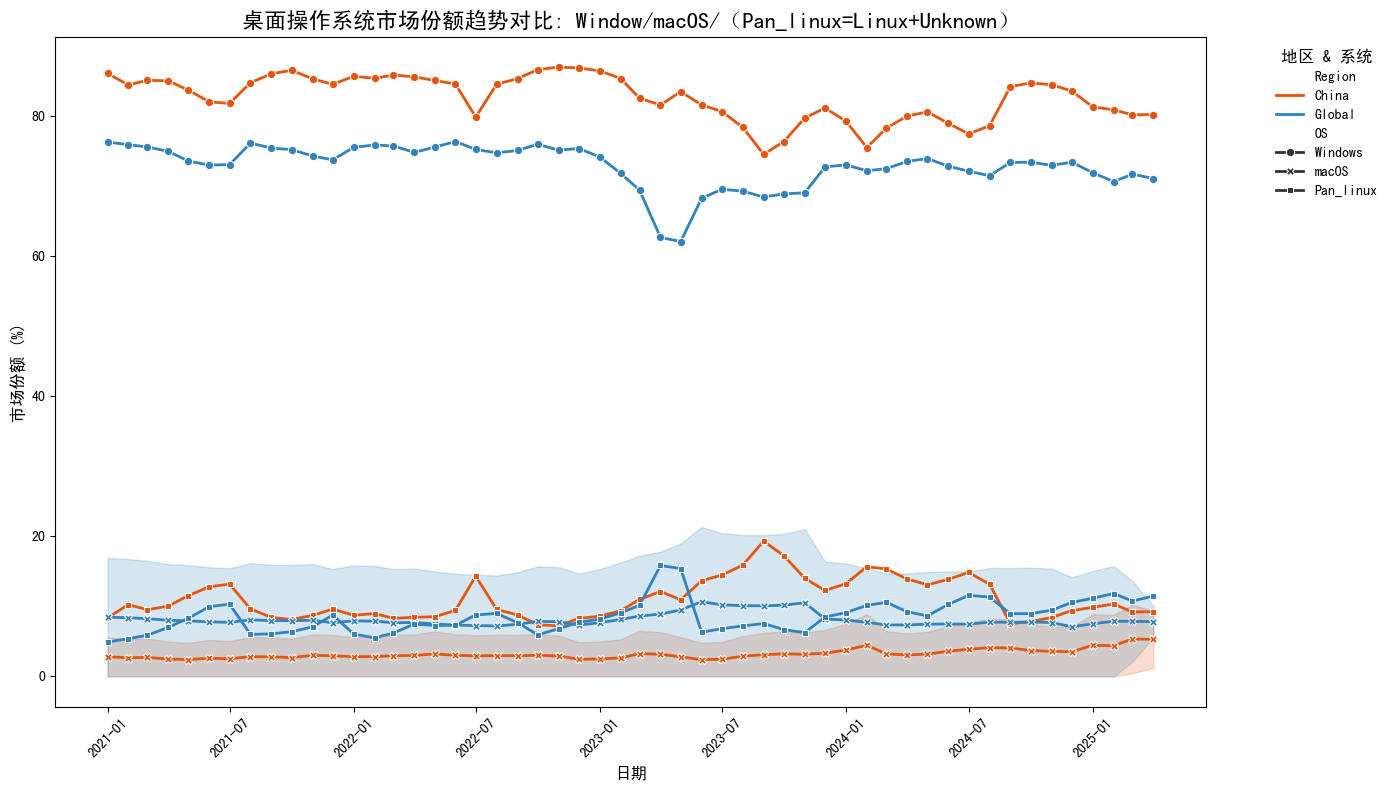

In [10]:
# 提取目标列（Windows、macOS、合并后的Other_Group）
target_os = ["Windows", "macOS", "Pan_linux"]

# 将宽格式转为长格式
melted_df = combined_df.melt(
    id_vars=["Date", "Region"],
    value_vars=target_os,
    var_name="OS",
    value_name="Market_Share"
)

# 绘图
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=melted_df,
    x="Date",
    y="Market_Share",
    hue="Region",    # 区分国内和国外
    style="OS",      # 区分不同操作系统
    markers=True,
    dashes=False,
    palette={"China": "#e6550d", "Global": "#3182bd"},
    linewidth=2
)

# 优化显示
plt.title("桌面操作系统市场份额趋势对比: Window/macOS/（Pan_linux=Linux+Unknown）", fontsize=16)
plt.xlabel("日期", fontsize=12)
plt.ylabel("市场份额 (%)", fontsize=12)
plt.xticks(rotation=45)

# 调整图例
legend = plt.legend(
    title="地区 & 系统",
    bbox_to_anchor=(1.05, 1),
    title_fontsize=12,
    fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()